In [1]:
import sys
sys.path.insert(1, 'D:/kaneshi')
import kaneshi

import matplotlib.pyplot as plt

from kaneshi.config import ROOT_DIR
from kaneshi.utils import read_df
from kaneshi.core import strategies
from kaneshi.core.market_data import MarketData

In [2]:
strategy_name = 'RSI'  # 'SMAC'

In [3]:
save = False

plot = True
plot_type = 'plt'

plot_return = True
return_type = 'plt'
return_dep_type = 'cumulative'

In [4]:
btc_2021 = read_df(f'{ROOT_DIR}/tests/BTC_2021')
market_data = MarketData(raw_df=btc_2021, interval=60)

In [5]:
params = {'RSI': {'rsi_period': 7,
                  'bottom_edge': 20,
                  'upper_edge': 80},
          'SMAC': {'sma': 100,
                   'lma': 300}
         }

### Clear strategy

In [6]:
clear = getattr(strategies, f'{strategy_name}Clear')(**params[strategy_name],
                                                     market_data=market_data).apply()

clear.generate_report()

[40, 13.903871, -0.596502, 0.675, 5694.0, 0.149937, -0.332206]

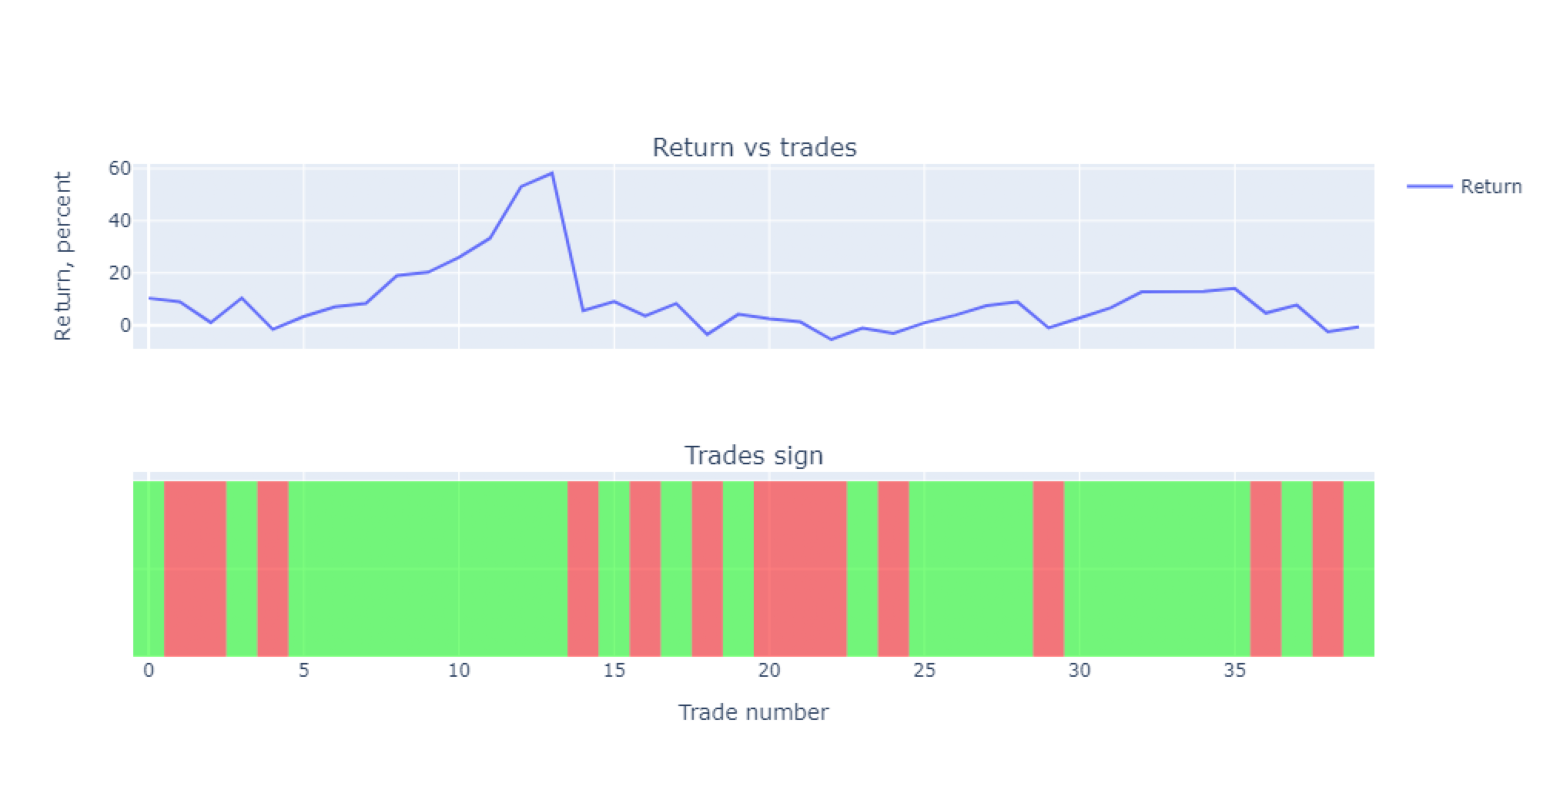

In [7]:
if plot_return: clear.plot_return(return_type)

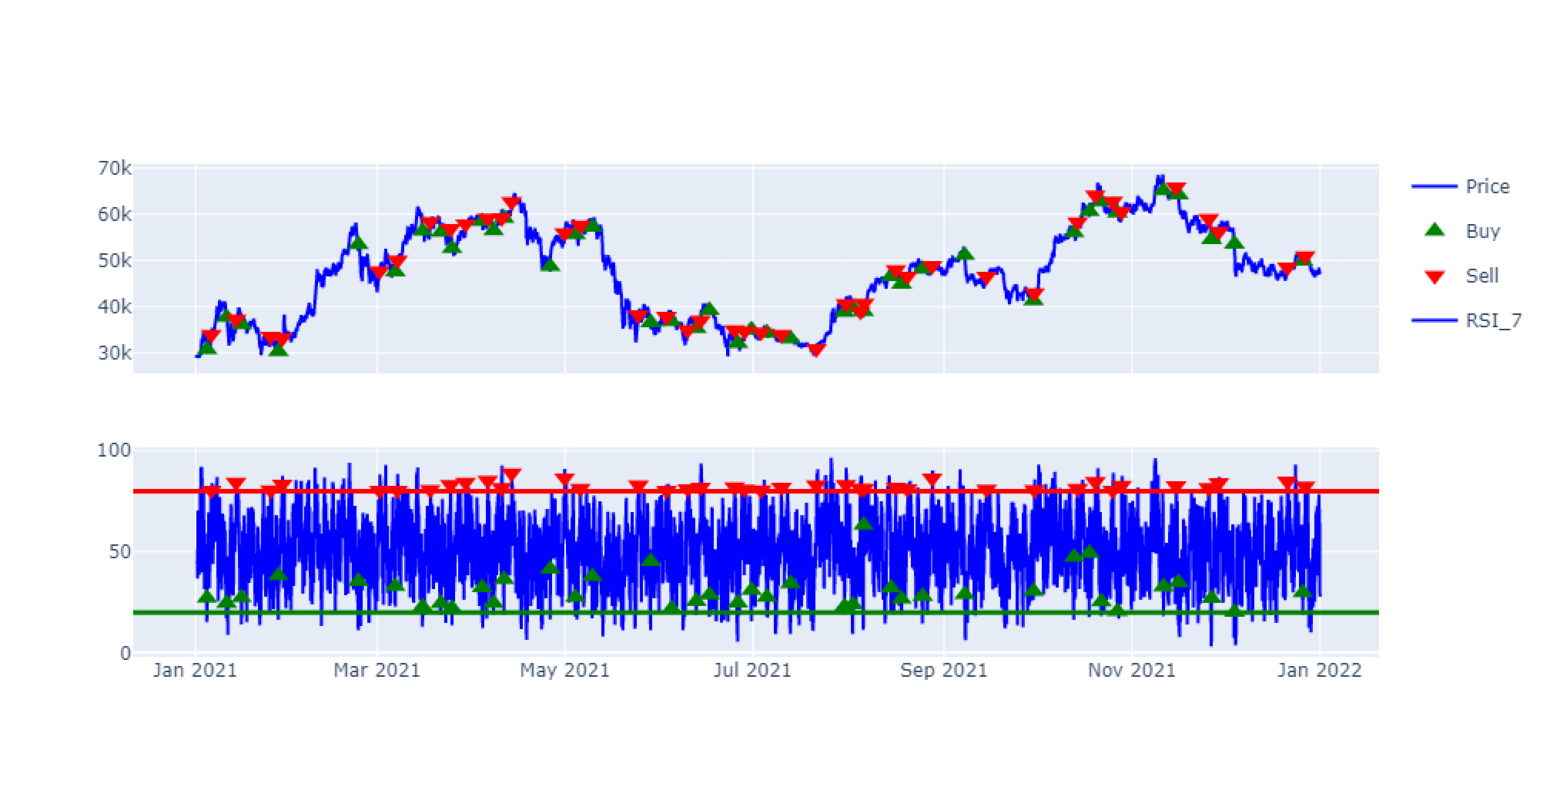

In [8]:
if plot: clear.plot(plot_type)

### Strategy with stop loss

In [9]:
stop_loss_percent = -0.01

stop_loss = getattr(strategies, f'{strategy_name}FixedStop')(**params[strategy_name],
                                                             stop_loss_percent=stop_loss_percent,
                                                             market_data=market_data).apply()

stop_loss.generate_report()

[38, -43.640884, -35.527677, 0.0, 4967.368421, -0.01, -0.01]

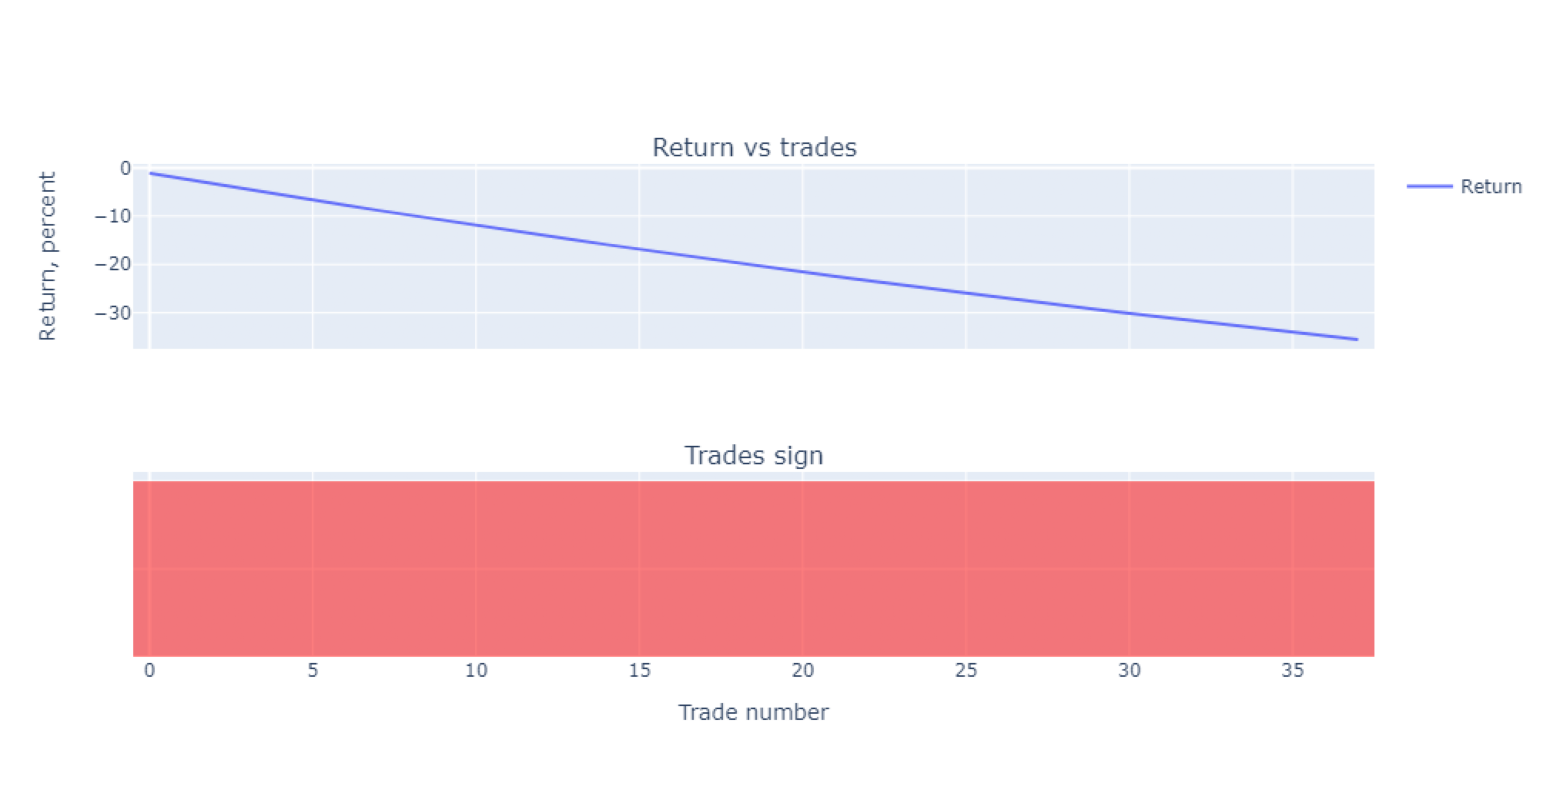

In [10]:
if plot_return: stop_loss.plot_return(return_type)

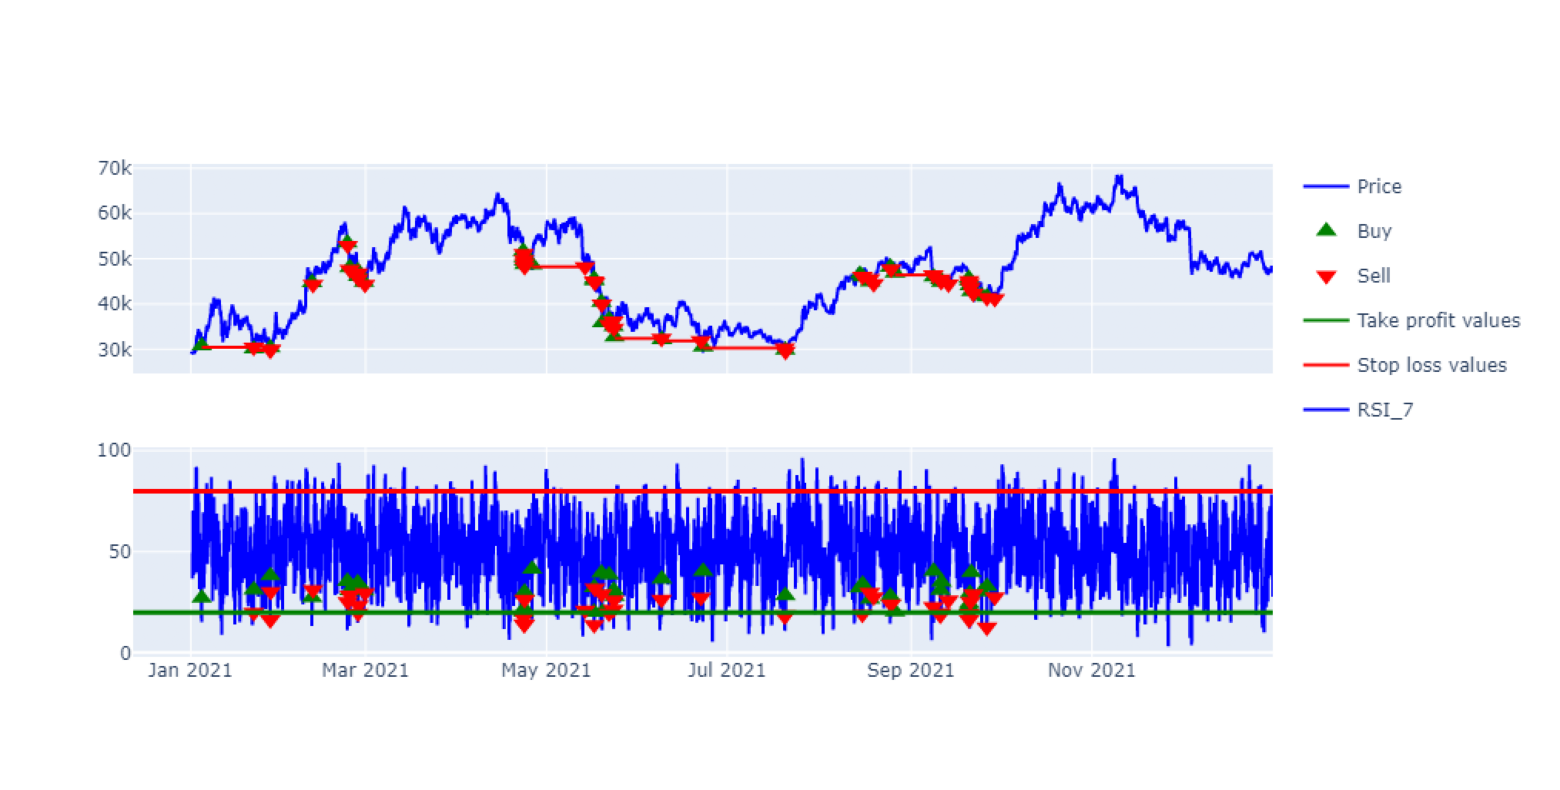

In [11]:
if plot: stop_loss.plot(plot_type)

### Strategy with take profit

In [12]:
take_profit_percent = 0.01

take_profit = getattr(strategies, f'{strategy_name}FixedStop')(**params[strategy_name],
                                                               take_profit_percent=take_profit_percent,
                                                               market_data=market_data).apply()

take_profit.generate_report()

[39, 33.093716, 39.032976, 1.0, 878.461538, 0.01, 0.01]

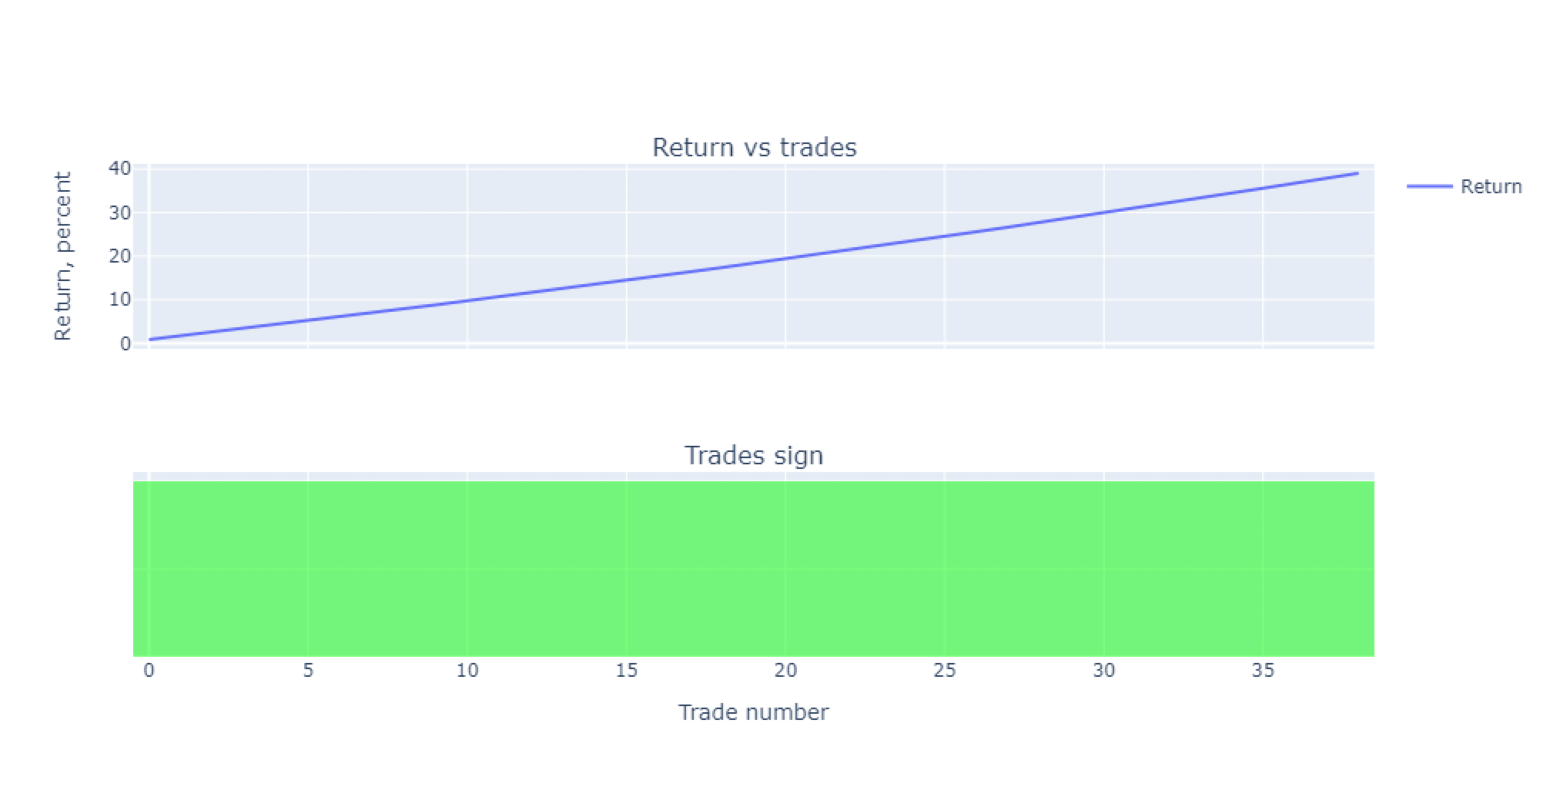

In [13]:
if plot_return: take_profit.plot_return(return_type)

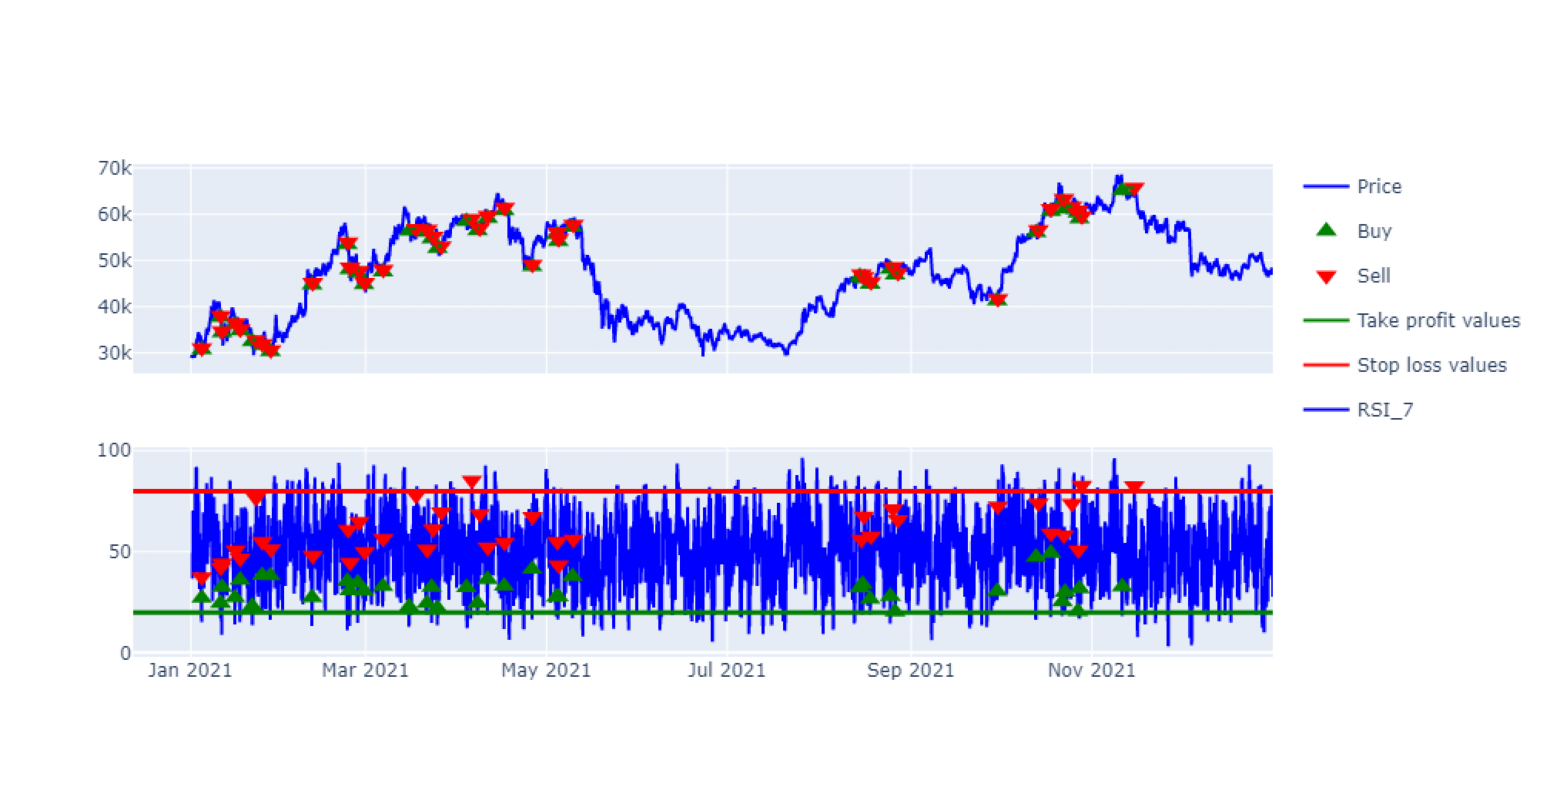

In [14]:
if plot: take_profit.plot(plot_type)

### Strategy with stop loss and take profit

In [15]:
stop_loss_percent = -0.01
take_profit_percent = 0.01

stop_take = getattr(strategies, f'{strategy_name}FixedStop')(**params[strategy_name],
                                                             stop_loss_percent=stop_loss_percent,
                                                             take_profit_percent=take_profit_percent,
                                                             market_data=market_data).apply()

stop_take.generate_report()

[130, -13.501684, -13.200688, 0.523077, 285.230769, 0.01, -0.01]

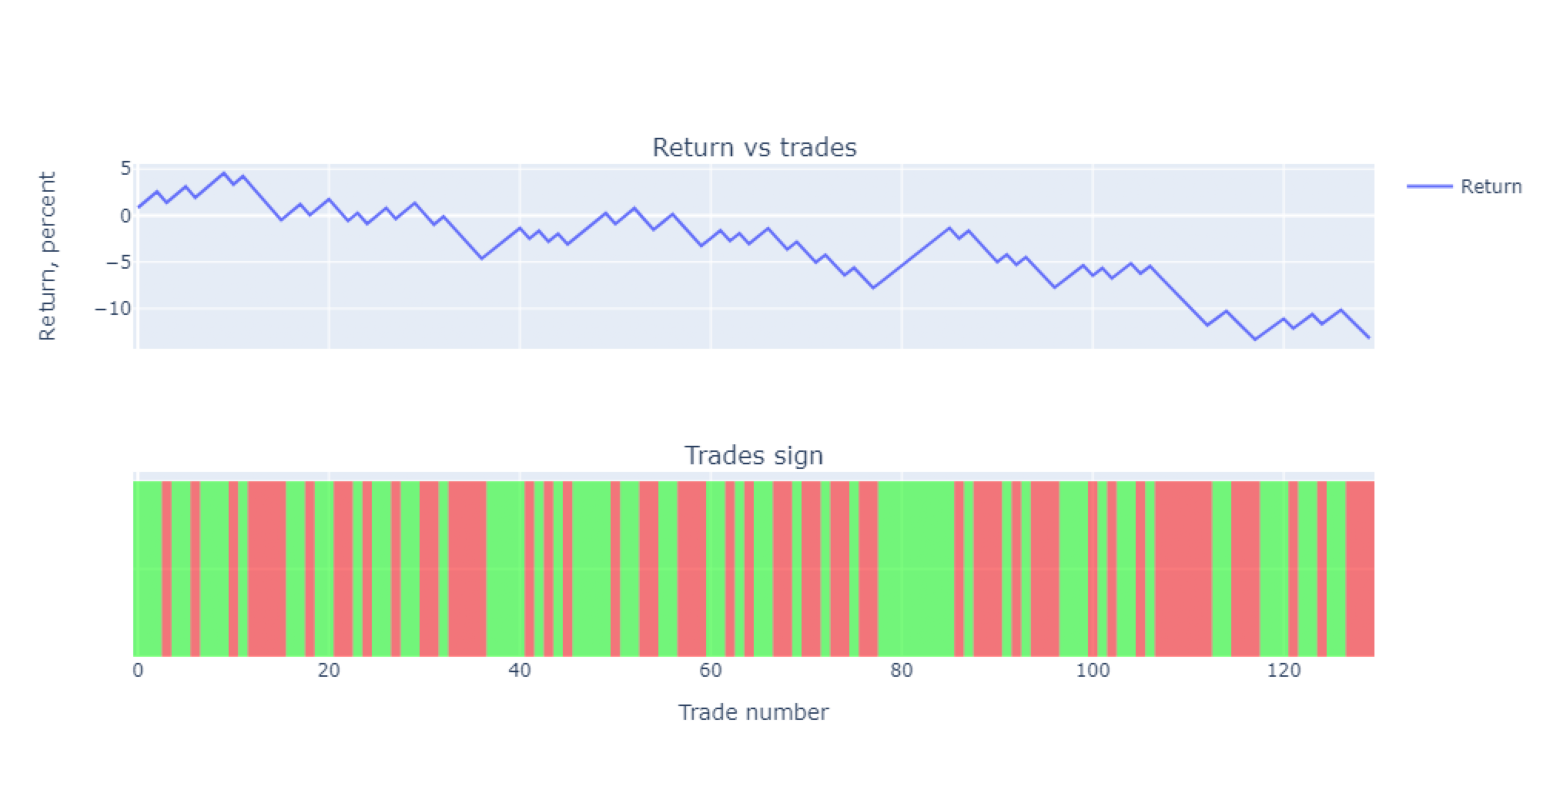

In [16]:
if plot_return: stop_take.plot_return(return_type)

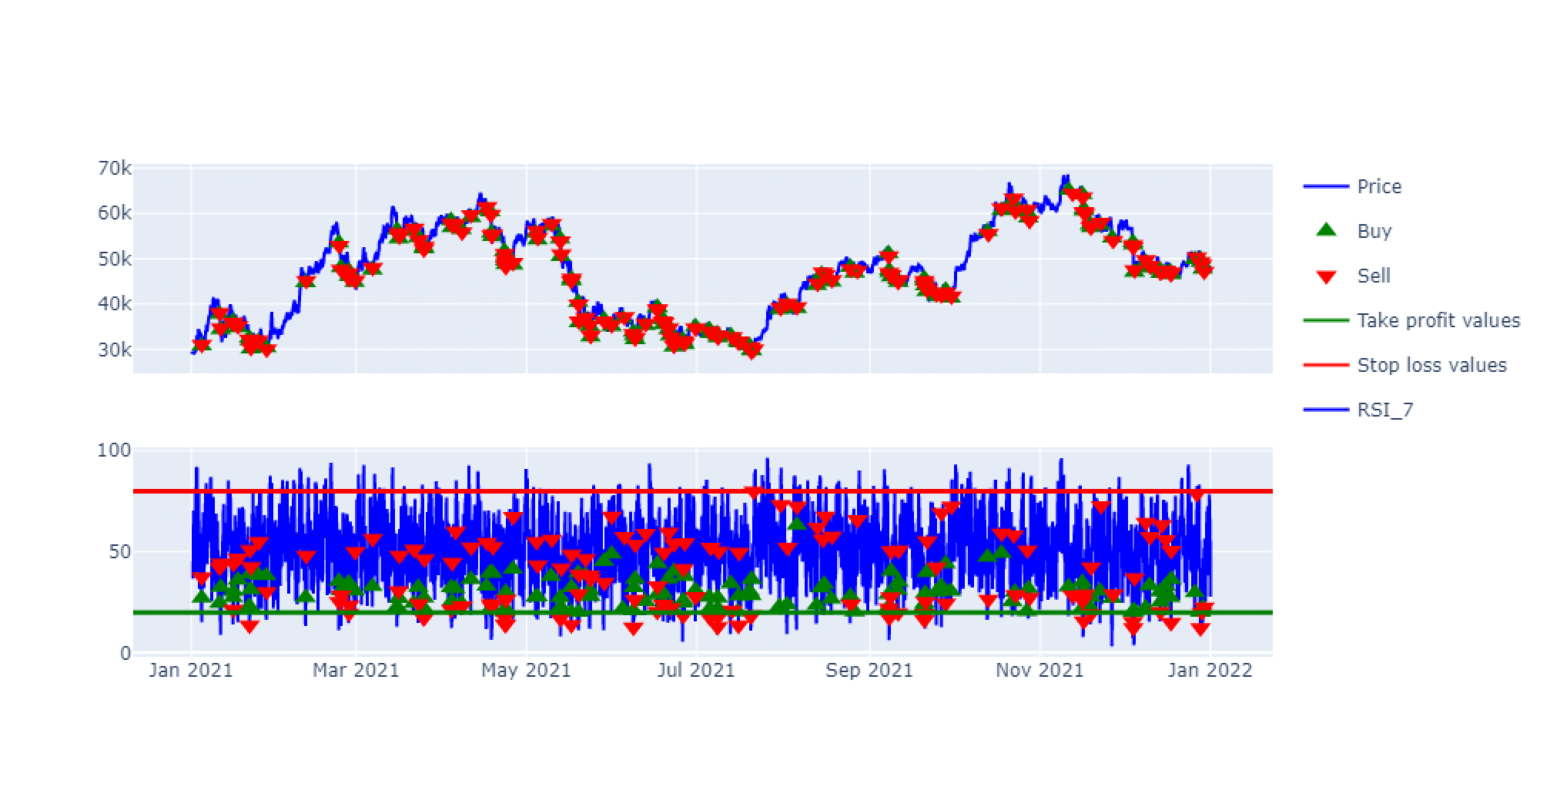

In [17]:
if plot: stop_take.plot(plot_type)

In [18]:
def save_test_plots():
    strategies = {'clear': clear, 'stop_loss': stop_loss, 'take_profit': take_profit, 'stop_take': stop_take}
    for s_type, s in strategies.items():
        plt.imsave(f'{strategy_name}_{s_type}_plot.png', s.plot(plot_type='array'))

if save:
    save_test_plots()